# Financial Fraud Dataset Overview
___

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.graphics.api import abline_plot
from random import sample

In [4]:
#Read in raw finanical fraud dataset CSV
df = pd.read_csv("/Users/sa14/Desktop/fin eda final/data/BankFraud_Data.csv")

In [4]:
#Get first 10 rows of the dataset
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
#Get the count of rows and columns for the dataset
df.shape

(6362620, 11)

**This dataset has 6,362,620 rows and 11 rows.**

In [6]:
#Get overall count of null/NaN values in the dataset
nan_count = df.isnull().sum()
print("Null Values by Column \n", nan_count)

Null Values by Column 
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


**This dataset does not contain any null values throughout all 6,362,620 rows and 11 rows**

In [7]:
#Describe the summary statistics of each numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#Determine the descriptive statistics of the dataset such as the mean, median, percentiles, etc.
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


___
## Univariate Analysis
___


> ### Pre-Existing Information about the "IsFraud" Column

Was this simulated transaction actually fraudulent? 

In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account before the account owner could secure their information. 

It is an integer column where:

* 0 = Indicates that the transaction is not fraud
* 1 = Indicates that the transaction is fraud
>

In [9]:
#Get count of unique transactions labeled isFraud
isfraud_count = df["isFraud"].value_counts()

#Convert isfraud_count to a dataframe
isfraud_count.to_frame()

,count
isFraud,
0,6354407
1,8213


In [10]:
#Display the proporion of transactions flagged as Not Fraud or Fraud
isfraud_prop = df["isFraud"].value_counts(normalize=True)

#Convert the flagged_prop series into a dataframe
isfraud_prop.to_frame()

,proportion
isFraud,
0,0.998709
1,0.001291


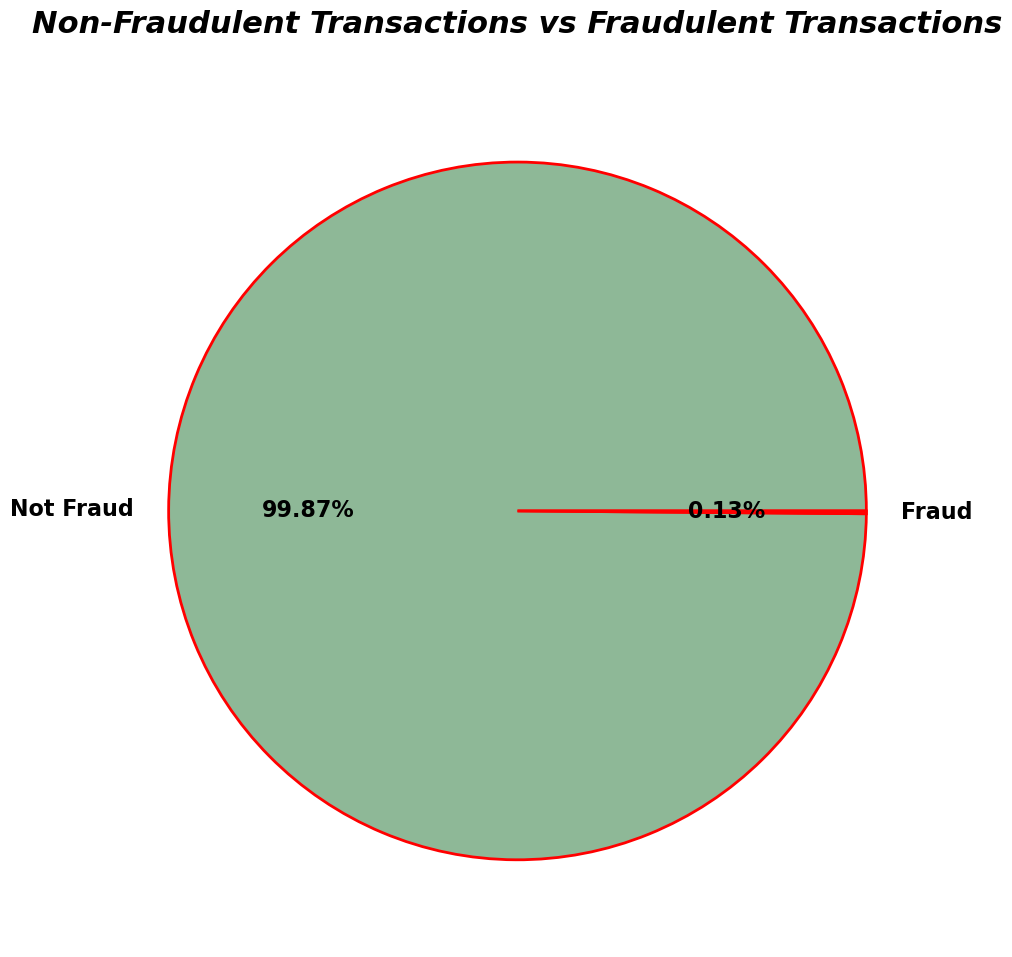

In [10]:
#Visualize amount of fraudulent transactions and non-fradulent transactions as a pie plot
isfraud_pie = [6354407, 8213] #Specific count of non-fraudulent transacations vs fraudulent transactions
labelp = ["Not Fraud", "Fraud"]
explode = [0.5, 0.5]
pf_colors = ["#8EB897", "#DD7596"]


plt.rcParams["figure.figsize"] = (10,10)
plt.title("Non-Fraudulent Transactions vs Fraudulent Transactions\n", fontsize=22, 
          weight='bold', style='italic')
plt.pie(isfraud_pie, labels=labelp, autopct= "%1.2f%%", colors = pf_colors,  
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'red' }, 
        textprops={'fontsize': 16, 'weight' : 'bold', 'color': 'black'})
plt.tight_layout()
plt.show()

> ### IsFraud Column Initial Analysis
>
> * There are 6,354,407 total non-fradulent transactions out of 6,362,620 overall transactions.
>
> * There are 8,213 total fraudlent transactions out of 6,362,620 overall transactions.
>
> * **Only 0.0001291% of all transactions are fradulent.** 
>
> * 99.87% of all transactions are not fraudulent.


___ 
> ### Pre-Existing Information about the "IsFlaggedFraud" column

A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD) expressed as an integer

* 0 = Indicates that the transaction has been not flagged as fraud
* 1 = Indicates that the transaction has been flagged as fraud

In [12]:
#Get count of unique transactions labeled isFlaggedFraud
flagged_count = df["isFlaggedFraud"].value_counts().to_frame()

print ("Count of Unique Transactions Labeled 'IsFlaggedFraud' \n ")
flagged_count

Count of Unique Transactions Labeled 'IsFlaggedFraud' 
 


,count
isFlaggedFraud,
0,6362604
1,16


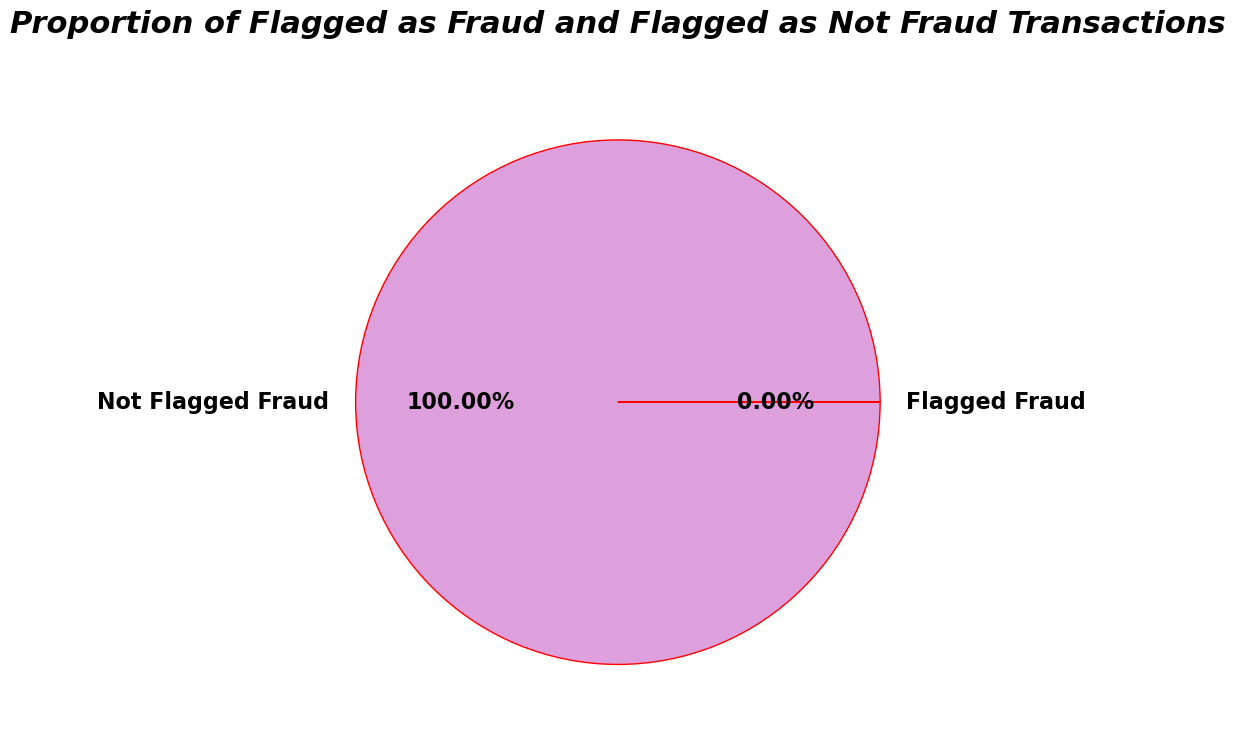

In [12]:
#Display the proportion of transactions flagged as Not Fraud or Fraud
flagged_prop = df["isFlaggedFraud"].value_counts(normalize=True)

#Convert the flagged_prop series into a dataframe
flagged_prop.to_frame()

#Visualize amount of flagged fraudulent transactions and transactions flagged as non-fradulent as a pie plot
isflag_pie = [6362604, 16] #Specific count of flagged fraud/flagged not fraud transactions
labelfl = ["Not Flagged Fraud", "Flagged Fraud"]
explode = [0.5, 0.5]
fl_colors = ["#DDA0DD", "#FFFF14"]


plt.rcParams["figure.figsize"] = (10,10)
plt.title("Proportion of Flagged as Fraud and Flagged as Not Fraud Transactions\n",
          fontsize=22, weight='bold', style='italic')
plt.pie(isflag_pie, labels=labelfl, autopct= "%1.2f%%", colors = fl_colors,  
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'red' }, 
        textprops={'fontsize': 16, 'weight' : 'bold', 'color': 'black'})
plt.tight_layout()

plt.show()

___
> ### IsFlaggedFraud Column Initial Analysis

* There are 6,362,604 total transactions flagged as not fraudulent out of 6,362,620 overalls transactions.
    * 99.9% of transactions were not classified/flagged as fraud by the naive model
* There are only 16 total fraudulent transactions out of 6,362,620 overall transactions.
* These flagged fraud transactions make up just 0.0003% of the dataset.

> This information may indicate that there is an issue with the pre-existing naive model's classification abilities.

___

> ### Pre-Existing Information about the "type" column
The type of transaction initiated expressed as a string.

* CASH_IN indicates a deposit
* CASH_OUT indicates a withdrawal, leading to a integer less than or equal to 0.00 in the amount column


In [15]:
#Get count of unique transaction types in the dataset
type_amounts = df["type"].value_counts().to_frame()
print("Count of Unique Transaction Types \n", type_amounts)

Count of Unique Transaction Types 
             count
type             
CASH_OUT  2237500
PAYMENT   2151495
CASH_IN   1399284
TRANSFER   532909
DEBIT       41432


/var/folders/6k/9kv93tt9525g263ch7552sy80000gn/T/ipykernel_94339/3251402875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', edgecolor="green", palette= "Set2")


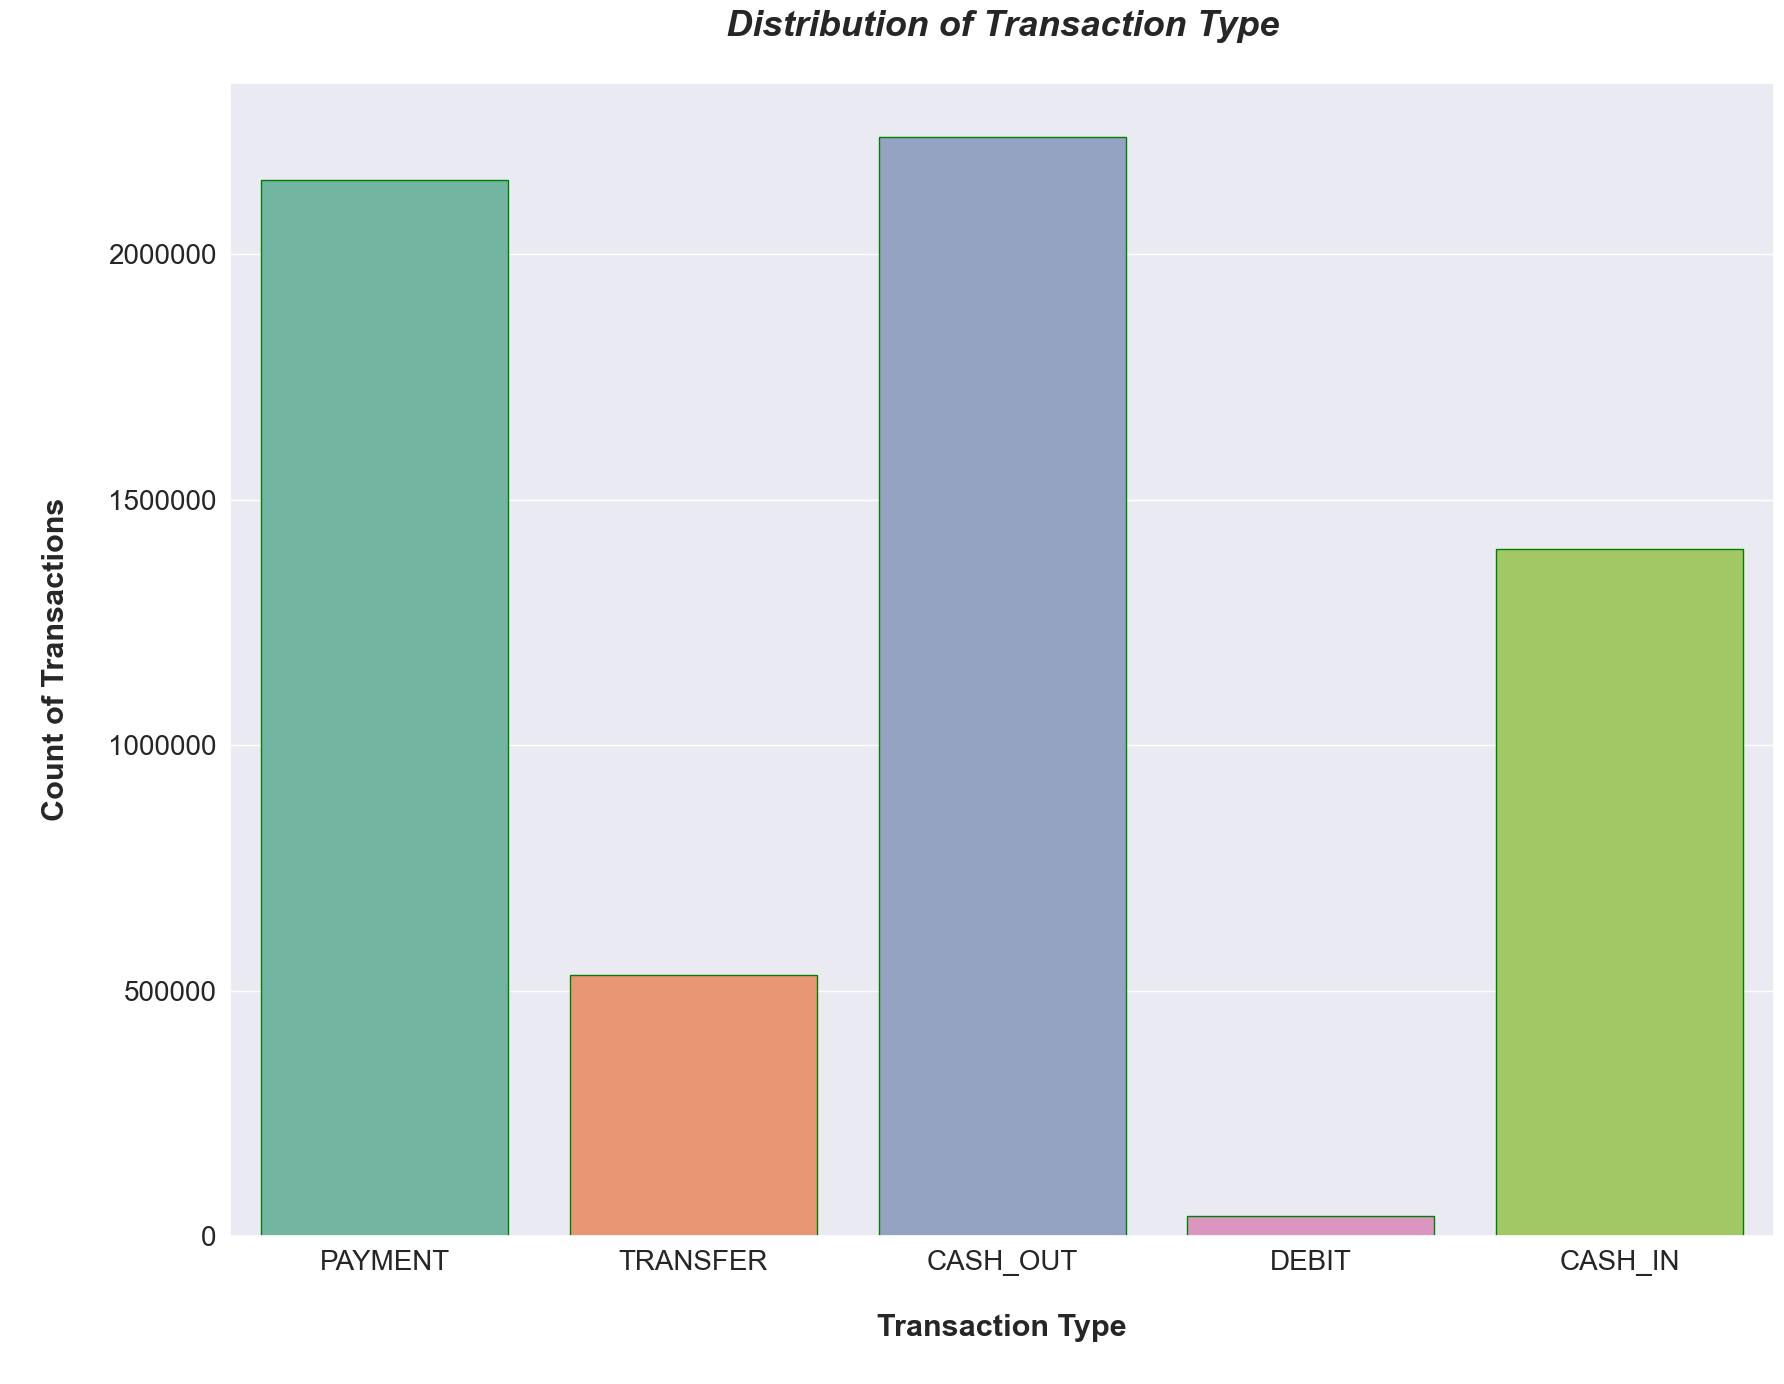

In [19]:
#Create bar graph for univariate analysis of the count of the types of transactions
plt.figure(figsize=(18, 14))

sns.set_theme(style="darkgrid")
sns.countplot(data=df, x='type', edgecolor="green", palette= "Set2")

plt.title('Distribution of Transaction Type\n', fontsize=26, weight='bold', style='italic')
plt.xlabel('\nTransaction Type\n', fontsize=22, weight='bold' )
plt.ylabel('\nCount of Transactions\n', fontsize=22, weight='bold')

#Remove scientfic notation from y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

___
> ### *type* Column Initial Analysis

* The majority of all transactions in this dataset are from payments or cash out (withdrawals).
* Debit transactions only make up a fraction of all activity.
___

> ### Pre-Existing Information about the "nameOrig" column
It is a string that represents the origin account name.

> ### Initial Hypothesis
Accounts with multiple transactions may be the source of the 8,213 instances of fraud.
___

In [17]:
#Examine the nameOrig column to determine amount of accounts that have only initiated 1 transaction
one_time_acc = df["nameOrig"].drop_duplicates()
one_time_acc = one_time_acc.value_counts(ascending=False)
one_time_acc.to_frame()

,count
nameOrig,
C1231006815,1
C1321016348,1
C1041348730,1
C1414646158,1
C1441203994,1
...,...
C1789356502,1
C1771722763,1
C2064983364,1


**There are 6,353,307 accounts that have initiated 1 transaction at this bank.**

In [18]:
#Examine the nameOrig column for unique value count and possible patterns
name_count = df["nameOrig"].value_counts(ascending=False)
all_freq_trans = name_count[name_count > 1].sort_values(ascending=False)
all_freq_trans.to_frame()


,count
nameOrig,
C1902386530,3
C2098525306,3
C363736674,3
C1530544995,3
C1065307291,3
...,...
C1001770944,2
C800314762,2
C365690312,2


**There are 9298 accounts that have conducted either 2 or 3 transactions.**

In [19]:
#Isolate accounts that have initiated more than 2 transactions
name_count = df["nameOrig"].value_counts(ascending=False)
max_transac = name_count[name_count > 2].sort_values(ascending=False)

max_transac.to_frame() 

,count
nameOrig,
C1902386530,3
C363736674,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
C1462946854,3
C1999539787,3
C2098525306,3


**Only 15 accounts have initiated 3 transactions.**

In [20]:
#Combine nameOrig count series into dataframe for visualization
acct_frequency = pd.concat([all_freq_trans, one_time_acc], axis=0)
acct_frequency.to_frame()

,count
nameOrig,
C1902386530,3
C2098525306,3
C363736674,3
C1530544995,3
C1065307291,3
...,...
C1789356502,1
C1771722763,1
C2064983364,1


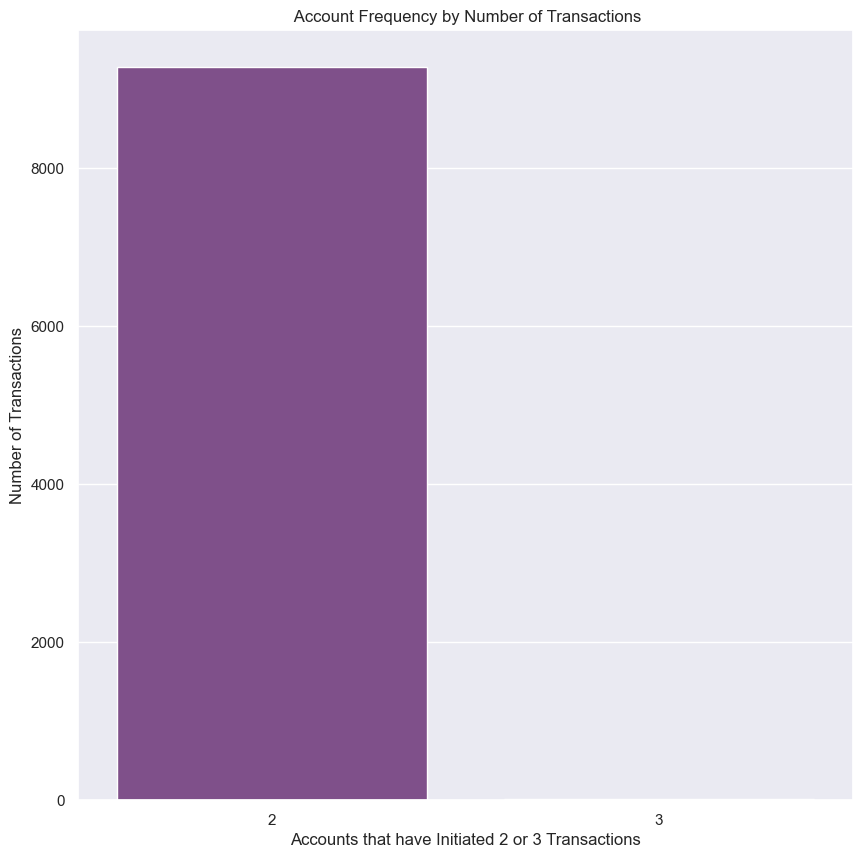

In [21]:
#Create countplot to visualize frequency of accounts that have conducted more than 1 transaction with this bank
plt.figure(figsize=(10, 10))
sns.set(style="darkgrid", palette="PRGn")
sns.countplot(data = df , x= all_freq_trans)
plt.xlabel('Accounts that have Initiated 2 or 3 Transactions')
plt.ylabel('Number of Transactions')
plt.title(' Account Frequency by Number of Transactions')
plt.show()

Text(0.5, 1.0, 'Number Accounts with 1, 2, or 3 Total Transactions')

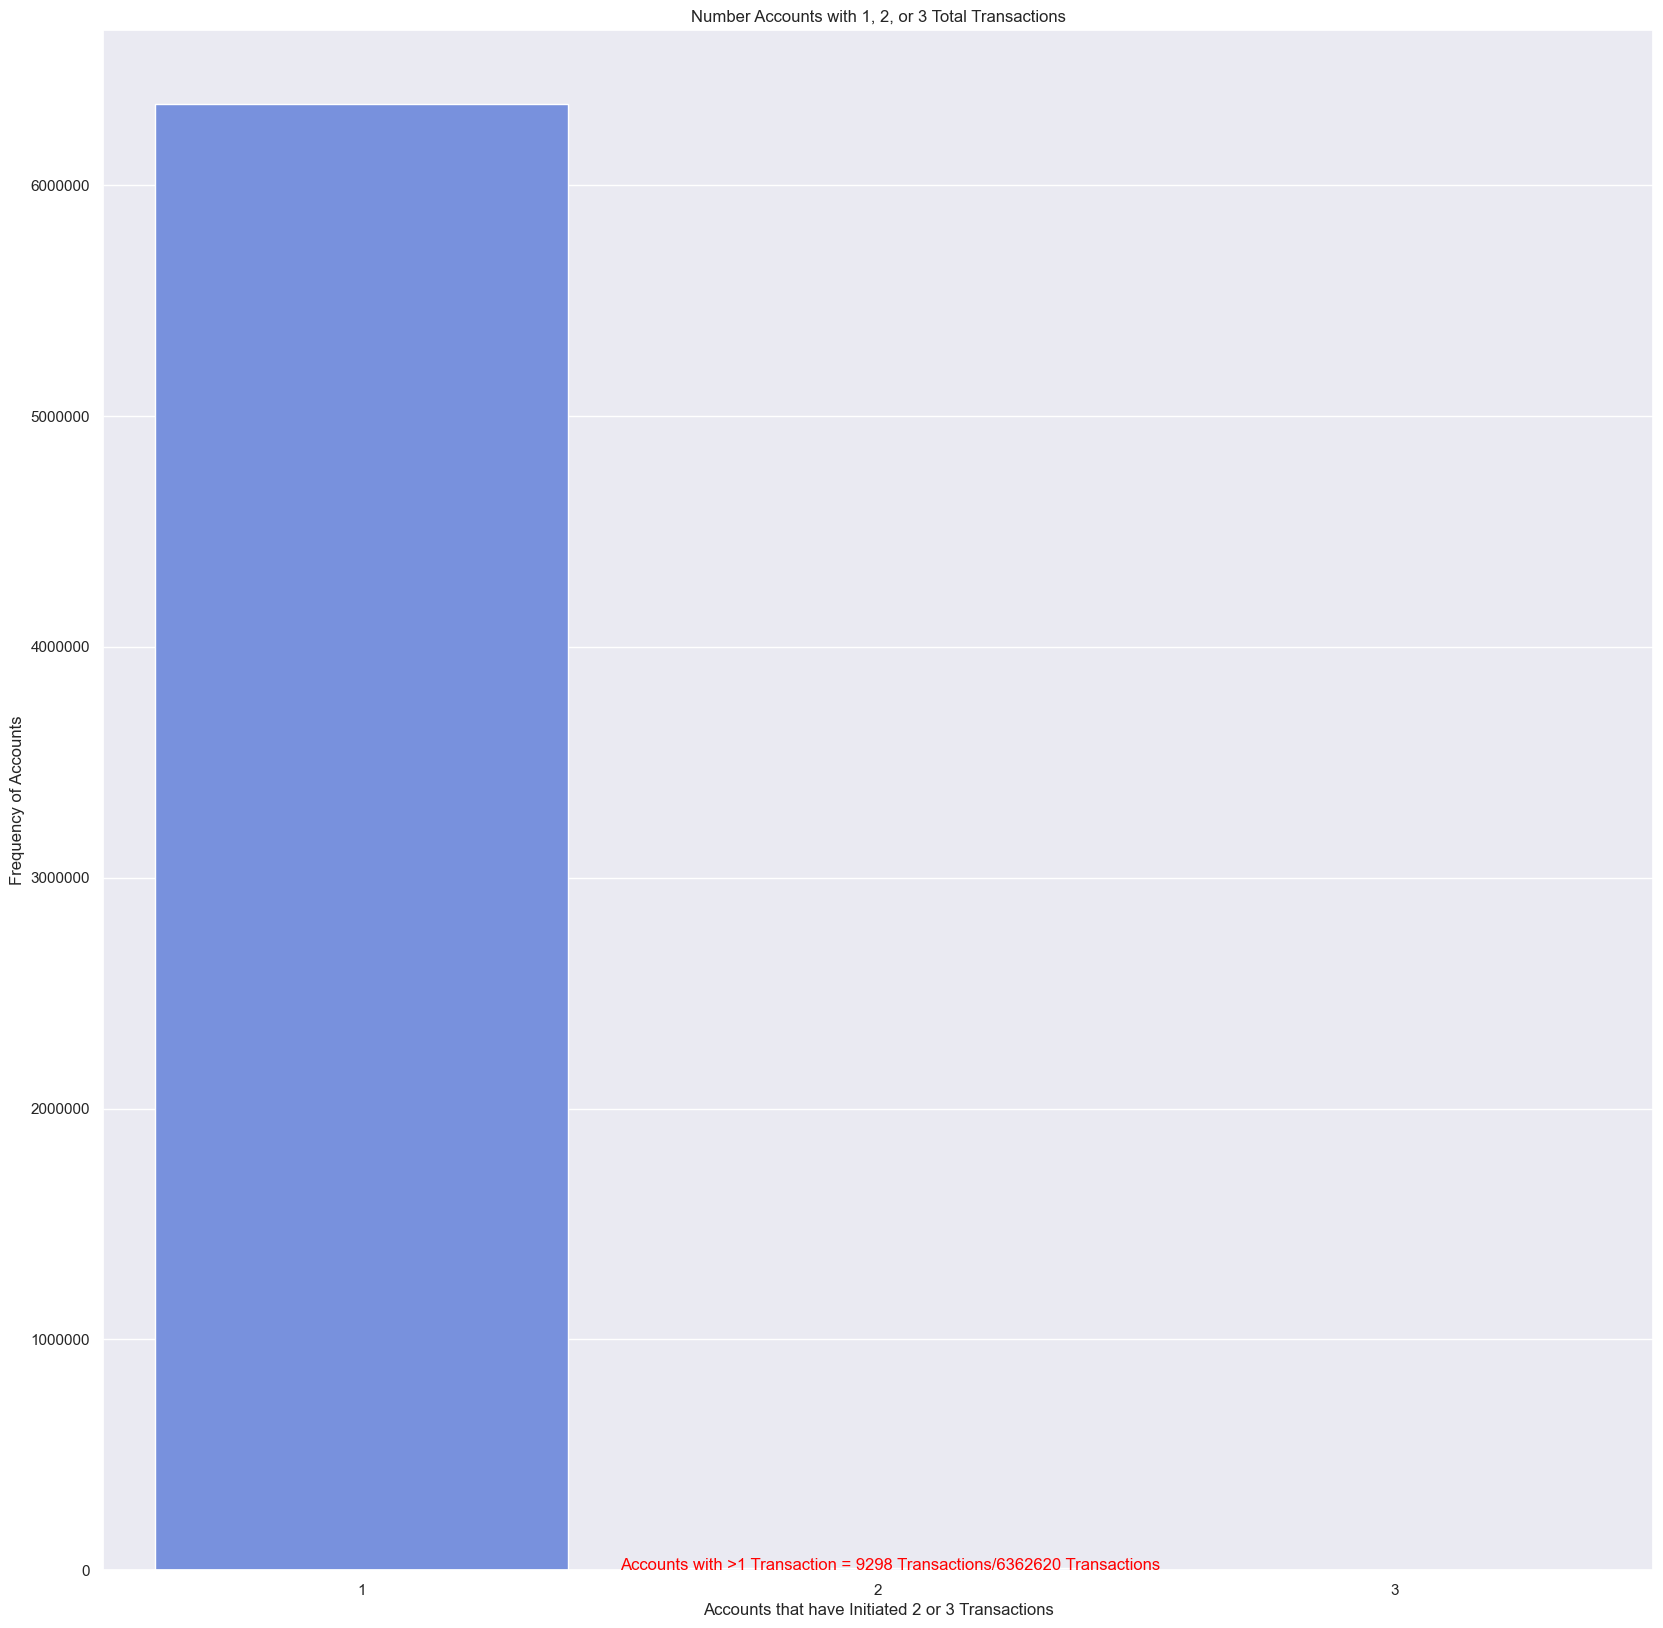

In [22]:
#Create count plot to visualize accounts transaction frequency by number of transactions

#This plot will display accounts with 1, 2, and 3 total transactions in one place
plt.figure(figsize= (20, 20))
sns.set(palette = "coolwarm", style= "darkgrid")
sns.countplot(data = df, x= acct_frequency)

plt.text (x=.5, y=.5, s="Accounts with >1 Transaction = 9298 Transactions/6362620 Transactions", fontsize=12, color = "red")
plt.xlabel('Accounts that have Initiated 2 or 3 Transactions')
plt.ylabel("Frequency of Accounts")

#Remove scientific notation from y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title( 'Number Accounts with 1, 2, or 3 Total Transactions')

> ### *nameOrig* Column Initial Analysis
* 15 accounts have initiated 3 transactions
* 9283 accounts have initiated 2 transactions
* There are 6,353,307 accounts that have initiated 1 transaction at this bank and they compose the overwhelming majority

The 8,213 instances of genuine fraud may have a higher chance of occurring among accounts that have only initiated one transaction.
___

> ### Pre-Existing Information about the *"Step"* column
A unit of time that represents hours in the dataset.

Think of this as the timestamp of the transaction (e.g. hour 1, hour 2, … hour 534, …) represented by an integer.
___

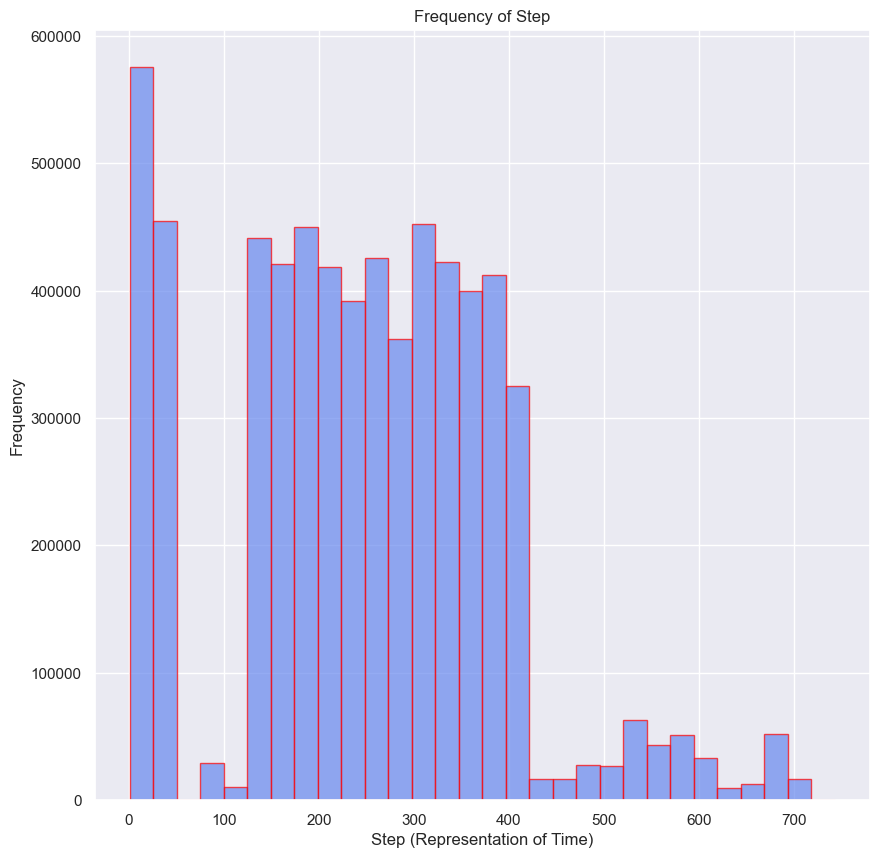

In [23]:
#Create histogram that analyzes the frequency of transactions by step
# df["step"].plot(kind="hist", bins=30, edgecolor="red", alpha=0.7)

df.hist(column="step", bins=30, edgecolor="red", alpha=0.7)

plt.xlabel("Step (Representation of Time)")
plt.ylabel("Frequency")
plt.title("Frequency of Step")
plt.show()

___
> ### Pre-Existing Information about the *"amount"* column
The amount of money transferred expressed as an integer.
___

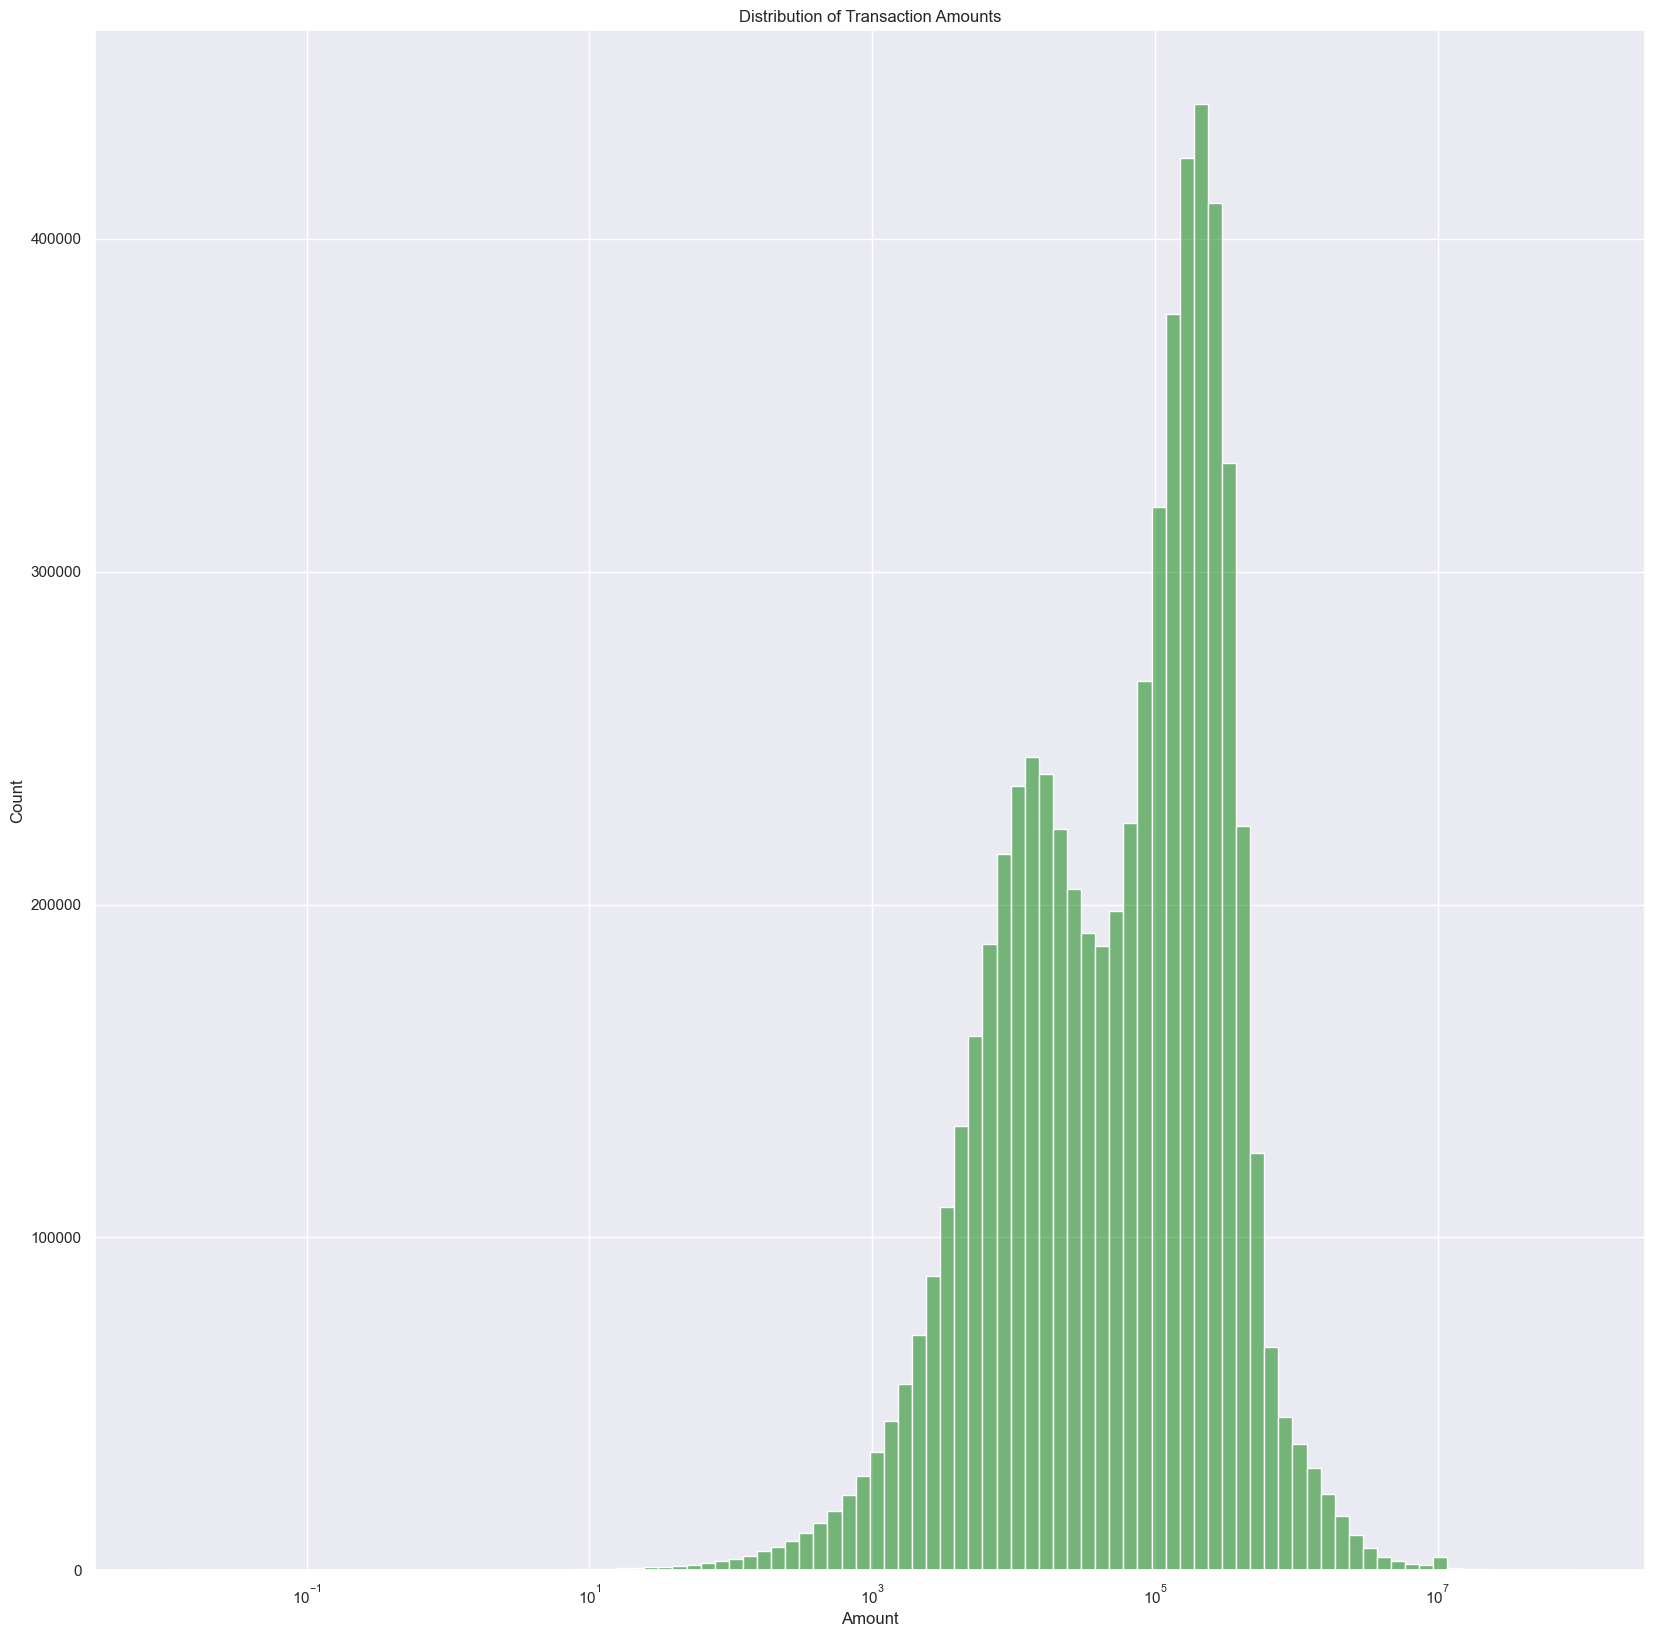

In [46]:
#Create histplot to display distribution of transaction amounts overall 
plt.figure(figsize=(20, 20))
sns.histplot(df['amount'], bins=100, kde=True, log_scale=True, color='green')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

___
## Bivariate Analysis
___

> ### Is fraud more likely to occur at certain times within this dataset?

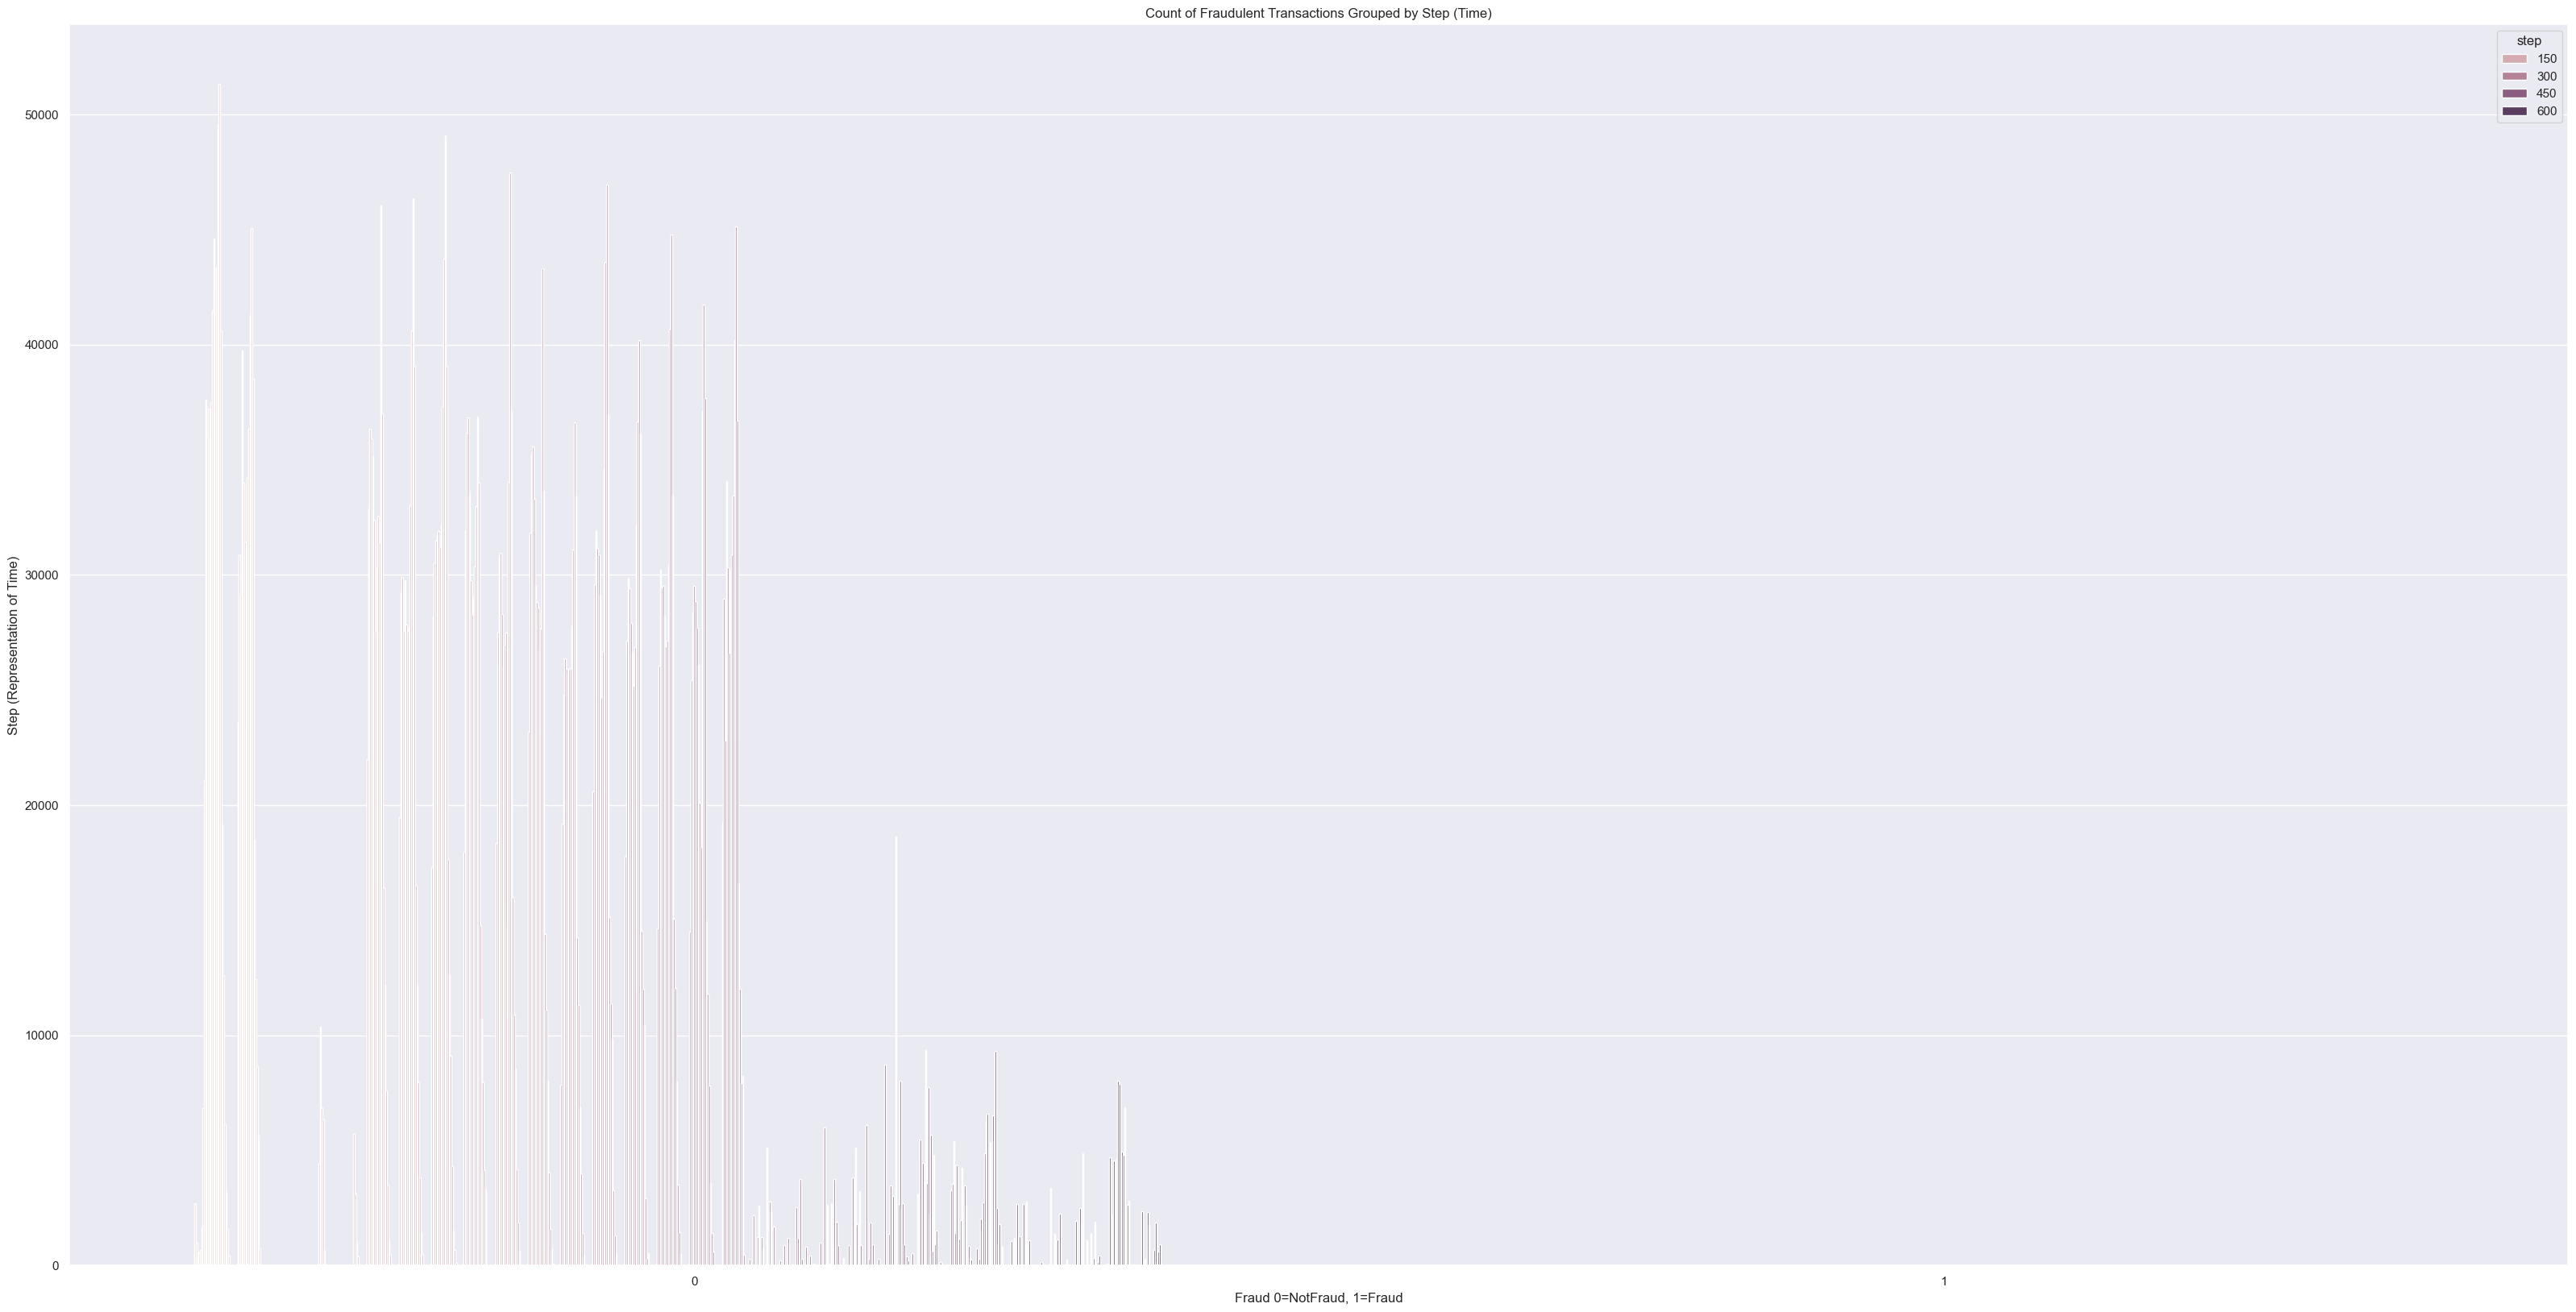

In [31]:
# Create a count plot that groups isFraud by step (time)

plt.figure(figsize=(40,20))
sns.set(palette = "magma", style= "darkgrid")
sns.countplot(data= df, x= "isFraud" , hue = "step")
plt.ylabel("Step (Representation of Time)")
plt.xlabel("Fraud 0=NotFraud, 1=Fraud")
plt.title('Count of Fraudulent Transactions Grouped by Step (Time)')

plt.show()

> ## How does the IsFlaggedFraud feature compare to the genuine instances of fraud in the IsFraud feature?

> ## Is fraud more likely to occur in specific types of transactions?

In [49]:
#Further Examination of the IsFraud Column

#Create a new filtered dataframe that specifically focuses on Genuine Fraudulent Transactions
real_fraud = df[df["isFraud"] == 1] 
real_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [50]:
#Create a new filtered dataframe that specifically catches transactions that were Genuinely Non-Fraudulent
gen_notfraud = df[df["isFraud"] == 0]
gen_notfraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


/var/folders/6k/9kv93tt9525g263ch7552sy80000gn/T/ipykernel_94339/3103274350.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=real_fraud.index, y=real_fraud.values, palette='magma')


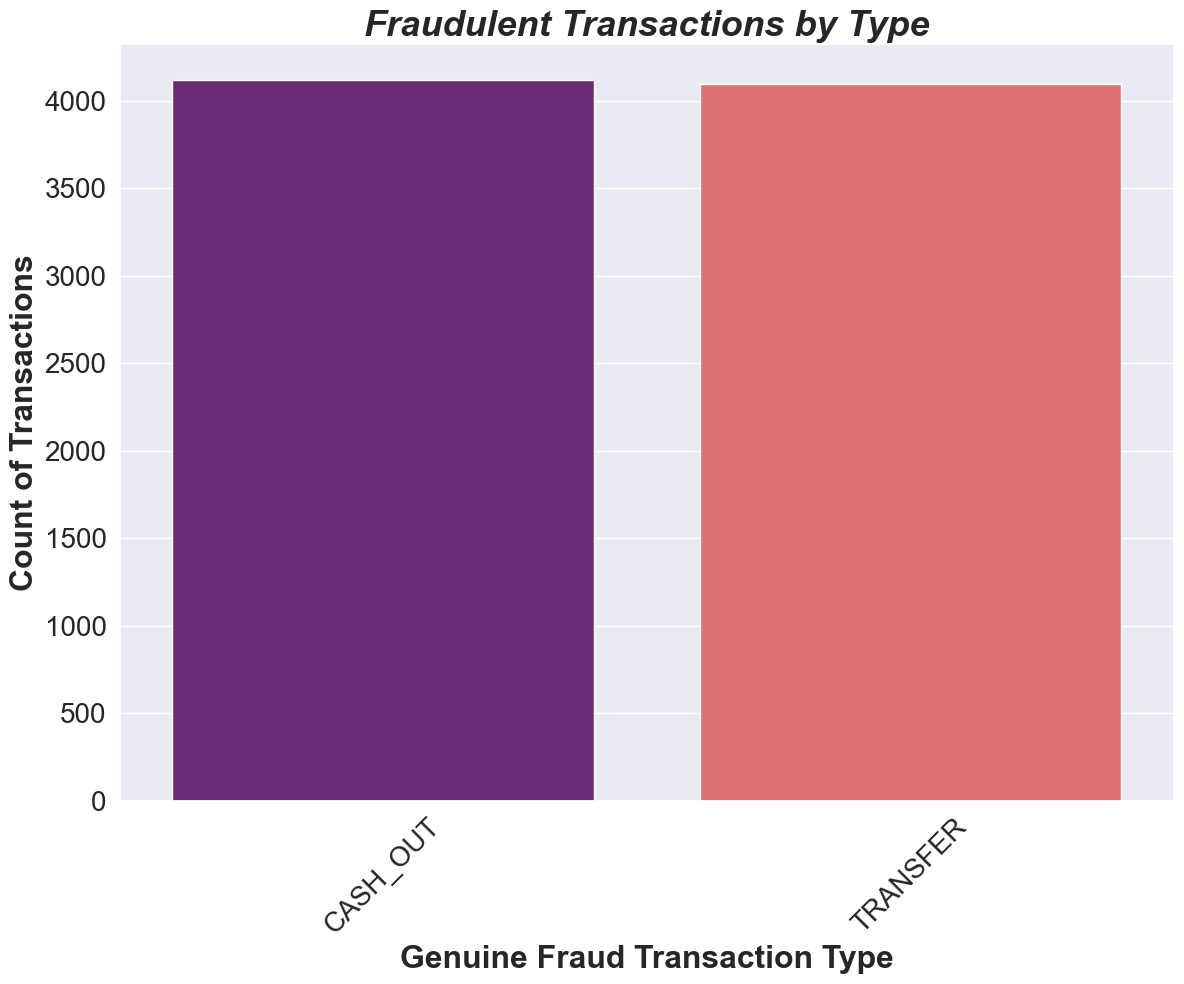

In [24]:
#Visualize counts of real fraud by type

real_fraud = df[df["isFraud"] == 1]["type"].value_counts()

plt.figure(figsize=(12,10))
sns.barplot(x=real_fraud.index, y=real_fraud.values, palette='magma')

plt.title("Fraudulent Transactions by Type", fontsize=26, weight='bold', style='italic')
plt.xlabel("Genuine Fraud Transaction Type", fontsize=23, weight='bold')
plt.ylabel("Count of Transactions", fontsize=23, weight='bold')

plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

> **Cash_Outs and Transfers account for all real instances of fraud.**

/var/folders/6k/9kv93tt9525g263ch7552sy80000gn/T/ipykernel_94339/698308061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_fraud_counts.index, y=non_fraud_counts.values,


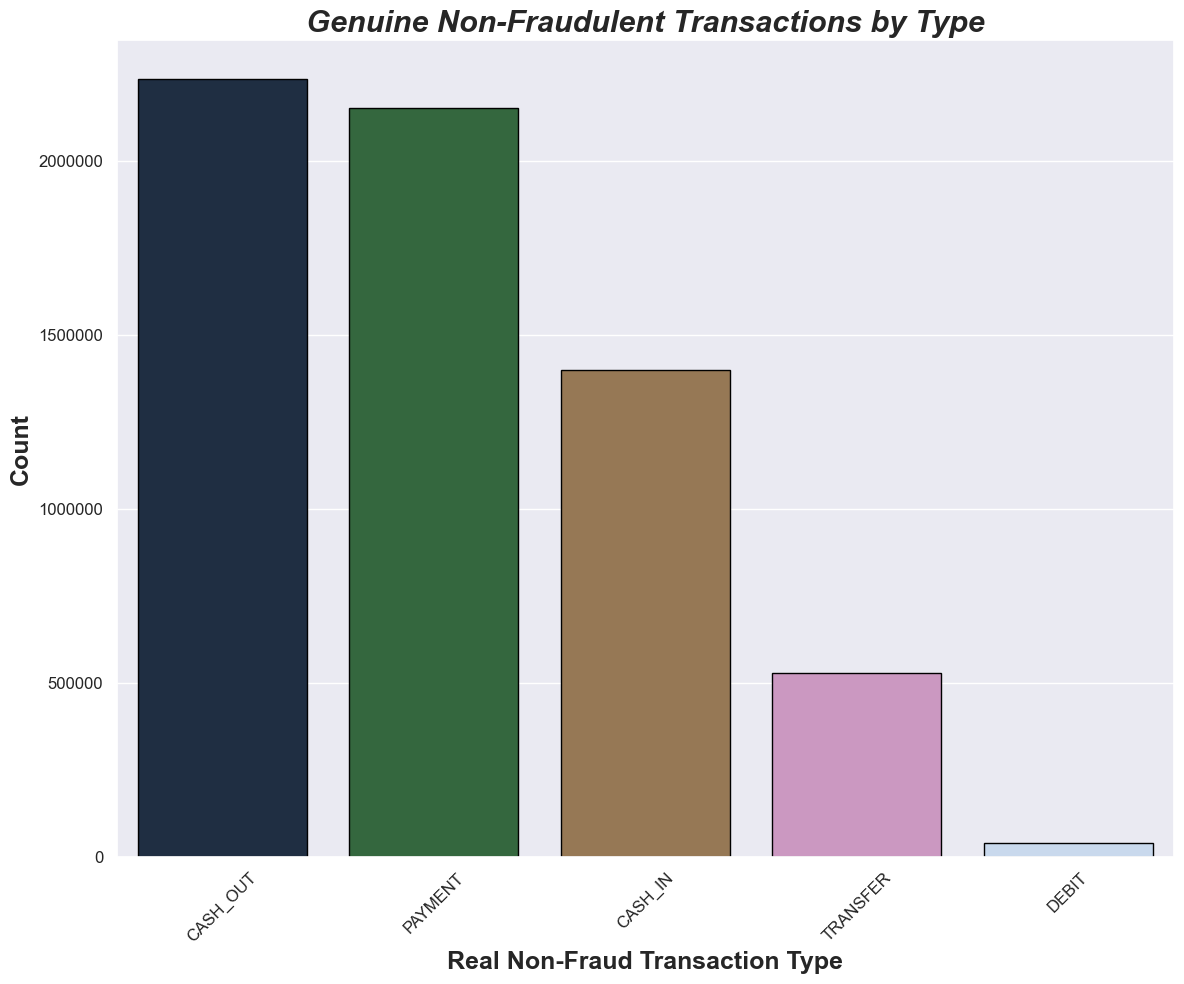

In [29]:
#Visualize counts of real non-fraud by type using the isFraud column and type column
non_fraud_counts = df[df["isFraud"] == 0]["type"].value_counts()

plt.figure(figsize=(12,10))

sns.barplot(x=non_fraud_counts.index, y=non_fraud_counts.values, 
            palette='cubehelix', edgecolor="black")
plt.title("Genuine Non-Fraudulent Transactions by Type", 
          fontsize=22, weight='bold', style='italic')
plt.xlabel("Real Non-Fraud Transaction Type", weight='bold',fontsize=18)
plt.ylabel("Count", weight='bold',fontsize=18)

#Remove scientific notation from y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 


plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

**Non-Fradulent Transactions by Type Insights/Analysis**
___
> **With real non-fraudlent transactions, Cash_Outs and Transfers still compose the majority. Debit is in the minority of overall non-fraud transactions.**

In [5]:
#Create df counts of transactions flagged as fraud by type using the isFlaggedFraud column 
flag_fraud = df[df["isFlaggedFraud"] == 1]["type"].value_counts()
flag_fraud

type
TRANSFER    16
Name: count, dtype: int64

/var/folders/6k/9kv93tt9525g263ch7552sy80000gn/T/ipykernel_30135/2116185109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flag_fraud.index, y=flag_fraud.values, palette='rocket')


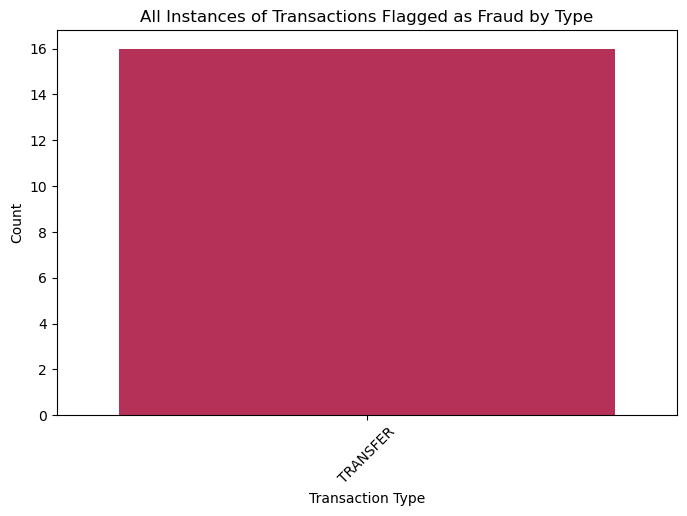

In [11]:
#Visualize counts of transactions flagged as fraud by type using the isFlaggedFraud column 
plt.figure(figsize=(8,5))

sns.barplot(x=flag_fraud.index, y=flag_fraud.values, palette='rocket')
plt.xlabel("Transaction Type")
plt.ylabel("Count")

#Remove scientific notation from y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 

plt.title("All Instances of Transactions Flagged as Fraud by Type")
plt.xticks(rotation=45)
plt.show()

In [6]:
#Create df counts of transactions flagged as NOT fraud by type using the isFlaggedFraud column 
flag_nonfraud = df[df["isFlaggedFraud"] == 0]["type"].value_counts()
flag_nonfraud

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532893
DEBIT         41432
Name: count, dtype: int64

**Flagged Fraud Transactions by Type Insights/Analysis**
___
> **All 16 transactions flagged as fraud are Transfers.**

___
## Multivariate Analysis
___

In [58]:
#Create dataset with only numeric features
features_numeric = df.select_dtypes(include=[np.number])
features_numeric

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


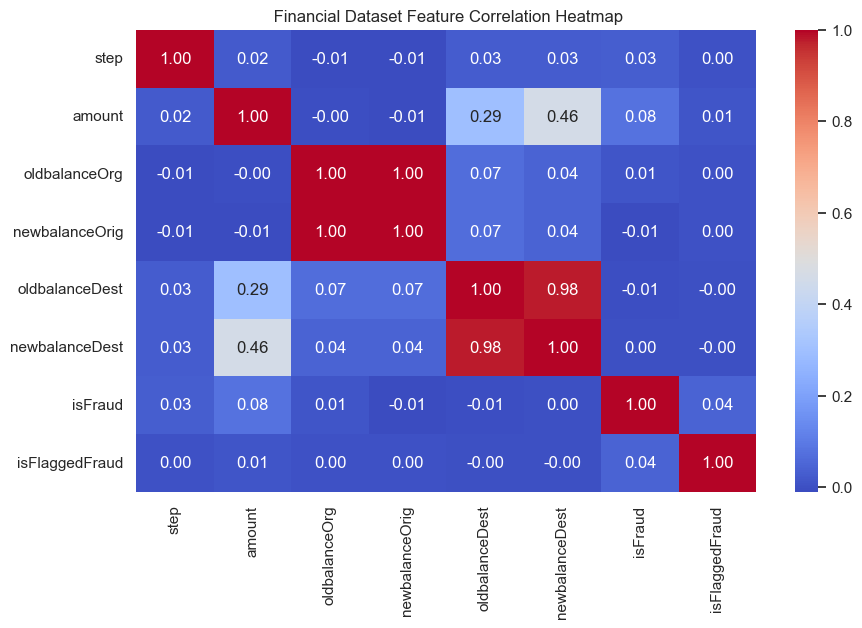

In [57]:
# Create Correlation Heatmap of Dataset Numeric Features
features_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(features_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(" Financial Dataset Feature Correlation Heatmap")
plt.show()

**Financial Dataset Feature Correlation Map Insights/Analysis**
___
*Main Points*
> * The **IsFraud** feature is *not* strongly correlated with other numeric features in the dataset. This may be an indication that genuine fraud is not straightforwardly connected to numeric traits and is thusly more difficult to detect through using those traits.
>
> * The **IsFlaggedFraud** feature possesses no impactful correaltion to the **IsFraud** feature. This is further proof that the existing fraud classification method is highly ineffective.

*Sub Points*
> * The transaction *amount* feature shows minimal correlation (0.29) to the *oldbalanceDest* feature and moderate correlation to the *newbalanceDest* feature (0.46). This is most likely due to the fact that payments and transfers are the majority of account activity.
>
> * There is a strong correlation between the *oldBalanceOrg* (The origin accounts balance before the transaction) and the *newBalanceOrg* (The origin accounts balance after the transaction) which makes sense as the new balance is a result of transaction acitivity that occurred in the old balance. 

>>  * The same is true for the *newbalanceDest* (The destination account's balance after the transaction) and the *oldbalanceDest* (The destination account's balance before the transaction) for the same reason.
